# Dimensionality Reduction

## Introduction 

<p align="right">
    <img src="dimensionality_reduction.png" height=220, width=240, alt="Your Image" style="float:right; margin-left:15px;" />
</p>

Dimensionality reduction is a technique that aims to transform data in a high-dimensional space into a low-dimensional space. Meaning, if a data set has a lot of features, say 40, dimensionality reduction would reduce the number of features to say 8, while retaining as much information about the features and the relationships within features in the process. The reason why people use dimensionality reduction is to improve the performance of a machine learning model by giving it less information to process, and make it easier to visualize the data. 

There are many dimensionality reduction techniques, including Principal Component Analysis (PCA), T-distributed Stochastic Neighbour Embedding (t-SNE), Linear Discriminant Analysis (LDA), Independent Component Analysis (ICA), and more. In my project, I utilize PCA and t-SNE, which are introduced below. 

Once again, I will be using the injury prevention factors data set. I will start with the full 8 injury prevention measures, and then will use PCA to determine the optimal number of components. Unlike in Naive Bayes, my target variable is the athlete's position, rather than the number of injuries that they have had. 

In [29]:
#| code-fold: true
from sklearn.model_selection import train_test_split
import pandas as pd 
import matplotlib as plt
from sklearn.preprocessing import StandardScaler

file_path = "../../../../data/01-modified-data/injury_prevention_data_soccer.csv"
soccer_injury = pd.read_csv(file_path)

soccer_injury.columns = soccer_injury.columns.str.strip()

soccer_injury = soccer_injury.replace({"yes": 1, "no": 0})
soccer_injury.head()

x_vars = ['Prevention Measure Stretching', 'Prevention Measure Warm Up',
       'Prevention Measure Specific Strength Exercises',
       'Prevention Measure Bracing', 'Prevention Measure Taping',
       'Prevention Measure Shoe Insoles', 'Prevention Measure Face Masks',
       'Prevention Measure Medical Corset']
target_var = "Position"

si_subset = soccer_injury[x_vars]

X = si_subset.copy()
y = soccer_injury[target_var].values.copy()
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5000)

## Principal Component Analysis (PCA)

Principal Component Analysis, or PCA, is a statistical dimensionality reduction technique that determines the number of relevant features to retain. It linearly transforms the data set into a new coordinate system with fewer dimensions, where the almost all of the variation in data can be explained with fewer dimensions than the initial data. 

PCA is a good technique to use if you want to visualize your data as it allows you to visualize the first two principal components in a 2D graph to visually identity the clsuters of closely related data points. 

In the following section, I will apply PCA to my dataset, determine the optimal number of principle components to retain, and create several visualizations of my results. My analysis of the findings will be included in the project report section. 



#### Determining Optimal Number of Principal Components to Retain

--------------------
The optimal numbers of features is: 5
--------------------


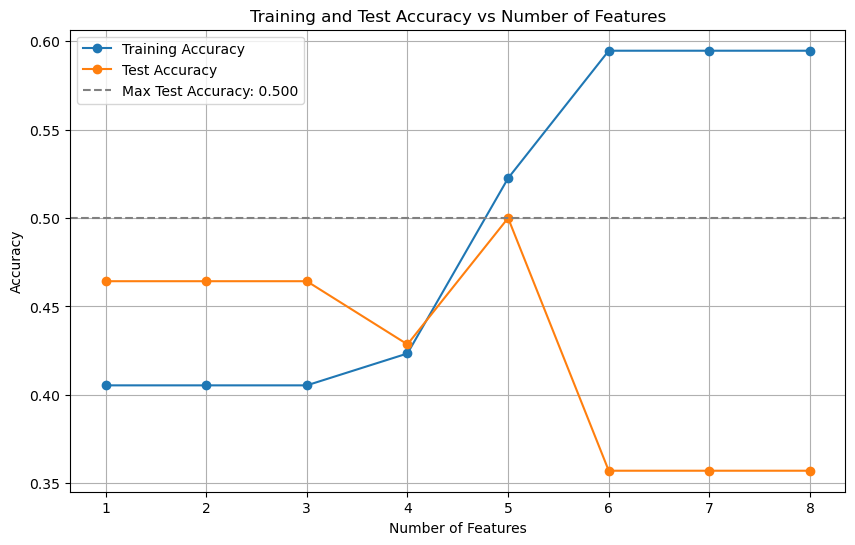

In [30]:
#| code-fold: true
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

clf = RandomForestClassifier(random_state=5000)

num_features_list = []
train_accuracy_list = []
test_accuracy_list = []

for num_features in range(1, X.shape[1] + 1):
    X_train_subset = X_train[:, :num_features]
    X_test_subset = X_test[:, :num_features]

    clf.fit(X_train_subset, y_train)

    y_train_pred = clf.predict(X_train_subset)
    y_test_pred = clf.predict(X_test_subset)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    num_features_list.append(num_features)
    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)

max_test_accuracy_index = np.argmax(test_accuracy_list)
optimal_num_features = num_features_list[max_test_accuracy_index]
max_test_accuracy = test_accuracy_list[max_test_accuracy_index]

print("--------------------")
print(f"The optimal numbers of features is: {optimal_num_features}")
print("--------------------")

plt.figure(figsize=(10, 6))
plt.plot(num_features_list, train_accuracy_list, label='Training Accuracy', marker='o')
plt.plot(num_features_list, test_accuracy_list, label='Test Accuracy', marker='o')

plt.axhline(y=max_test_accuracy, color='gray', linestyle='--', label=f'Max Test Accuracy: {max_test_accuracy:.3f}')

plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy vs Number of Features')
plt.legend()
plt.grid(True)
plt.show()

When visualizing the relationship between the number of features and the training/test accuracies, we can see that the ideal number of components to preserve is 5. At this point, both training and test accuracies peak. Further inclusion of features beyond this juncture results in diminishing returns, therefore opting for 5 principal components is ideal to achieve the best possible model performance.

#### Visualizing Components in 2D and 3D

--------------------

NUMERIC MEAN: [ 9.26517057e-17  2.55590912e-17  7.66772736e-17 -3.19488640e-17
  6.38977280e-17 -2.55590912e-17  0.00000000e+00  1.27795456e-17]
X SHAPE (139, 8)
NUMERIC COV:
[[ 1.00724638  0.17987456 -0.05641036  0.03082525  0.01701829 -0.04164767
   0.          0.02635633]
 [ 0.17987456  1.00724638  0.06734996  0.0167137   0.09153441  0.04881193
   0.          0.07920553]
 [-0.05641036  0.06734996  1.00724638 -0.01423268  0.04663228  0.04921846
   0.          0.12191545]
 [ 0.03082525  0.0167137  -0.01423268  1.00724638  0.24812509  0.03188526
   0.         -0.03092457]
 [ 0.01701829  0.09153441  0.04663228  0.24812509  1.00724638  0.11284549
   0.          0.11439477]
 [-0.04164767  0.04881193  0.04921846  0.03188526  0.11284549  1.00724638
   0.         -0.05259292]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.02635633  0.07920553  0.12191545 -0.03092457  0.11439477 -0.05259292
   0.          1.00724638]]
--

/var/folders/kw/p7j6fdpx3vvgm6c0krhwpvb80000gn/T/ipykernel_70329/71215022.py:38: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



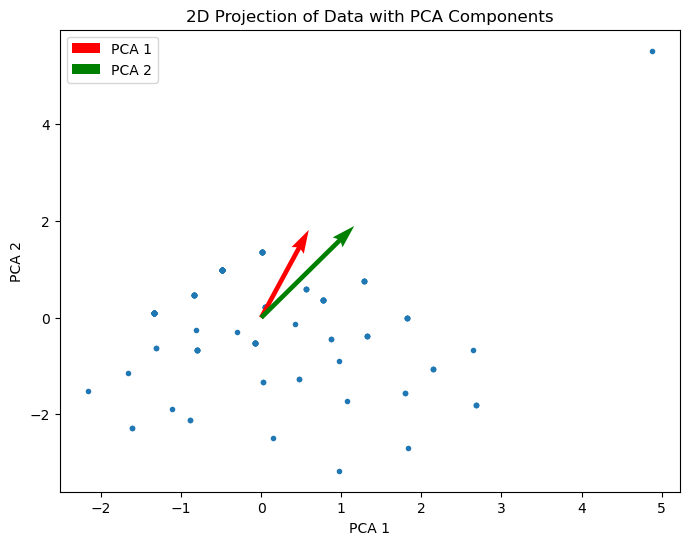

--------------------
3D Visualization
--------------------


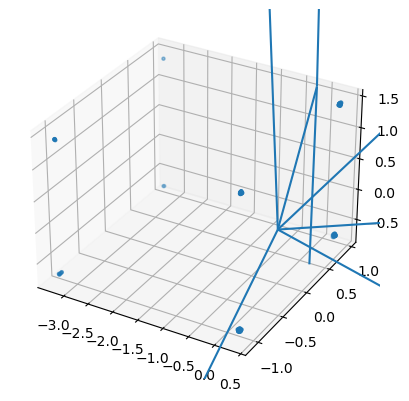

In [31]:
#| code-fold: true
#| warning: false
from sklearn.decomposition import PCA
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import plotly.io as pio

print("--------------------")
print('\nNUMERIC MEAN:',np.mean(X,axis=0))
print("X SHAPE",X.shape)
print("NUMERIC COV:")
print(np.cov(X.T))
print("--------------------")

w, v1 = LA.eig(np.cov(X.T))
print("--------------------")
print("\nCOV EIGENVALUES:",w)
print("COV EIGENVECTORS (across rows):")
print(v1.T)
print("--------------------")

pca = PCA(n_components=5) 
pca.fit(X)
print("--------------------")
print('\nPCA')
print(pca.components_)
v2=pca.components_
print("--------------------")

#print(v1/v2)

print("--------------------")
print("2D Visualization")
print("--------------------")

X_2d = np.dot(X, v2[:2, :].T)
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], marker=".", cmap="viridis")

plt.quiver(0, 0, v2[0, 0], v2[0, 1], color='r', scale=3, label='PCA 1')
plt.quiver(0, 0, v2[1, 0], v2[1, 1], color='g', scale=3, label='PCA 2')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('2D Projection of Data with PCA Components')
plt.legend()
plt.show()

print("--------------------")
print("3D Visualization")
print("--------------------")

jitter = 0.01 * np.random.randn(*X.shape)
X += jitter

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker=".")
v1=v1*1000
v2=v2*1000

ax.quiver(0,0,0,v1[0,0],v1[1,0],v1[2,0])
ax.quiver(0,0,0,v1[0,1],v1[1,1],v1[2,1])
ax.quiver(0,0,0,v1[0,2],v1[1,2],v1[2,2])

ax.quiver(0,0,0,v2[0,0],v2[1,0],v2[2,0])
ax.quiver(0,0,0,v2[0,1],v2[1,1],v2[2,1])
ax.quiver(0,0,0,v2[0,2],v2[1,2],v2[2,2])
plt.show()

#### Interactive Versions of 2D and 3D Graphs

In [47]:
#| code-fold: true
import numpy as np
import plotly.graph_objs as go
from sklearn.decomposition import PCA
import plotly
import plotly.io as pio
pio.renderers.default = "notebook"


pca = PCA(n_components=5)
pca.fit(X)

v2 = pca.components_

X_2d = np.dot(X, v2[:2, :].T)

scatter_2d = go.Scatter(
    x=X_2d[:, 0],
    y=X_2d[:, 1],
    mode='markers',
    marker=dict(
        size=8,
        color=np.arange(len(X)),  
        colorscale='Viridis',
        opacity=0.8
    ),
    text=['Point {}'.format(i) for i in range(len(X))],  
)

layout_2d = go.Layout(
    title='2D Projection of Data with PCA Components',
    xaxis=dict(title='PCA 1'),
    yaxis=dict(title='PCA 2'),
    showlegend=False,
)

fig_2d = go.Figure(data=[scatter_2d], layout=layout_2d)
#fig_2d.show()

pio.renderers.default = "plotly_mimetype+notebook_connected"
plotly.offline.plot(fig_2d, filename='PCA_2d_interactive.html')

IFrame(src='PCA_2d_interactive.html', width=800, height=600)

In [46]:
#| code-fold: true
jitter = 0.01 * np.random.randn(*X.shape)
X += jitter

scatter_3d = go.Scatter3d(
    x=X[:, 0],
    y=X[:, 1],
    z=X[:, 2],
    mode='markers',
    marker=dict(
        size=6,
        color=np.arange(len(X)),  
        colorscale='Viridis',
        opacity=0.8
    ),
    text=['Point {}'.format(i) for i in range(len(X))],  
)

layout_3d = go.Layout(
    title='3D Projection of Data with PCA Components',
    scene=dict(
        xaxis=dict(title='PCA 1'),
        yaxis=dict(title='PCA 2'),
        zaxis=dict(title='PCA 3'),
    ),
)

fig_3d = go.Figure(data=[scatter_3d], layout=layout_3d)

pio.renderers.default = "plotly_mimetype+notebook_connected"
plotly.offline.plot(fig_3d, filename='PCA_3d_interactive.html')

IFrame(src='PCA_3d_interactive.html', width=800, height=600)


#### Most Frequently Used Prevention Measures

/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



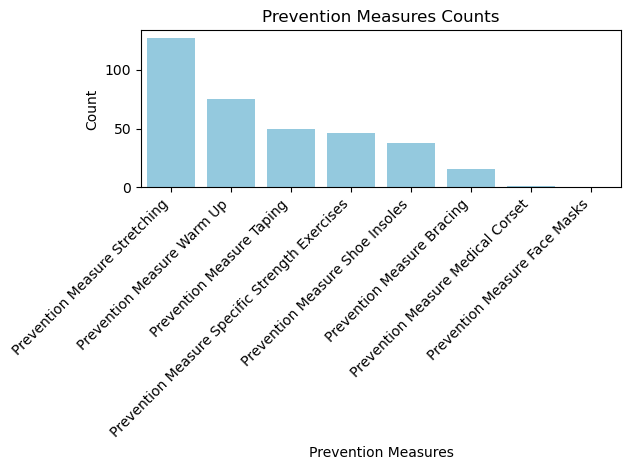

In [34]:
#| code-fold: true
#| warning: false
import seaborn as sns
import matplotlib.pyplot as plt

pm_counts = si_subset.sum()
pm_counts = pm_counts.sort_values(ascending=False)

sns.barplot(x=pm_counts.index, y=pm_counts.values, color='skyblue')
plt.title('Prevention Measures Counts')
plt.xlabel('Prevention Measures')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

## Dimensionality Reduction with t-SNE 

<p align="left">
    <img src="t-sne.png" height=273.8, width=283.4, alt="Your Image" style="float:right; margin-left:15px;" />
</p>

t-Distributed Stochastic Neighbour Embedding is an unsupervised non-linear dimensionality reduction technique for both data exploration and visualizing high-dimensional data. It reduced the dimensions but giving each data point in a two or three dimensional map. It examines the similarity between each pair of points, constructing a  map that preserves their relationships and reveals any patterns. Subsequently, it compresses these points onto a 2D map, where the distances between them mirror their similarities.

Perplexity is a parameter in the t-SNE algorithm, shaping how the algorithm manages the trade-off between maintaining local and global structures in the data. Put simply, perplexity is a gauge of the practical number of neighbors that each data point takes into account when undergoing the process of dimensionality reduction.

In order to find the optimal parameter for t-SNE, we can test out multiple values of perplexity. In the following code, I test the following values of perplexity: 5, 10, 30, and 50. In order to explore what effect different values of perplexity have, I, again, utilize interactive graphs. 

#### Perplexity = 5

In [49]:
#| code-fold: true
from sklearn.manifold import TSNE
import plotly.express as px

X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=5).fit_transform(X)

data = {
    'x': X_embedded[:, 0],
    'y': X_embedded[:, 1],
    'Stretching': si_subset["Prevention Measure Stretching"],
    'Warm Up': si_subset["Prevention Measure Warm Up"],
    'Strength Exercises': si_subset["Prevention Measure Specific Strength Exercises"],
    'Bracing': si_subset["Prevention Measure Bracing"],
    'Taping': si_subset["Prevention Measure Taping"],
    'Shoe Insoles': si_subset["Prevention Measure Shoe Insoles"],
    'Face Masks': si_subset["Prevention Measure Face Masks"],
    'Medical Corset': si_subset["Prevention Measure Medical Corset"]
}

df = pd.DataFrame(data)

print("RESULTS") 
print("shape : ",X_embedded.shape)
print("First few points : \n",X_embedded[0:2,:])

scatter_fig_5 = px.scatter(df, x='x', y='y', 
                         hover_data=['Stretching', 'Warm Up', "Strength Exercises", "Bracing", "Taping", "Shoe Insoles", "Face Masks", "Medical Corset"], 
                         template='simple_white',
                         title='Perplexity = 5')

pio.renderers.default = "plotly_mimetype+notebook_connected"
plotly.offline.plot(scatter_fig_5, filename='per5_interactive.html')

IFrame(src='per5_interactive.html', width=800, height=600)

RESULTS
shape :  (139, 2)
First few points : 
 [[-10.508396  53.720203]
 [-26.302603 -39.069176]]


#### Perplexity = 10

In [50]:
#| code-fold: true
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=10).fit_transform(X)

data = {
    'x': X_embedded[:, 0],
    'y': X_embedded[:, 1],
    'Stretching': si_subset["Prevention Measure Stretching"],
    'Warm Up': si_subset["Prevention Measure Warm Up"],
    'Strength Exercises': si_subset["Prevention Measure Specific Strength Exercises"],
    'Bracing': si_subset["Prevention Measure Bracing"],
    'Taping': si_subset["Prevention Measure Taping"],
    'Shoe Insoles': si_subset["Prevention Measure Shoe Insoles"],
    'Face Masks': si_subset["Prevention Measure Face Masks"],
    'Medical Corset': si_subset["Prevention Measure Medical Corset"]
}

df = pd.DataFrame(data)

print("RESULTS") 
print("shape : ",X_embedded.shape)
print("First few points : \n",X_embedded[0:2,:])

scatter_fig_10 = px.scatter(df, x='x', y='y', 
                         hover_data=['Stretching', 'Warm Up', "Strength Exercises", "Bracing", "Taping", "Shoe Insoles", "Face Masks", "Medical Corset"], 
                         template='simple_white',
                         title='Perplexity = 10')

pio.renderers.default = "plotly_mimetype+notebook_connected"
plotly.offline.plot(scatter_fig_10, filename='per10_interactive.html')

IFrame(src='per10_interactive.html', width=800, height=600)


RESULTS
shape :  (139, 2)
First few points : 
 [[-28.280321    -0.55170196]
 [  6.367788    25.649345  ]]


#### Perplexity = 30

In [51]:
#| code-fold: true
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=30).fit_transform(X)

data = {
    'x': X_embedded[:, 0],
    'y': X_embedded[:, 1],
    'Stretching': si_subset["Prevention Measure Stretching"],
    'Warm Up': si_subset["Prevention Measure Warm Up"],
    'Strength Exercises': si_subset["Prevention Measure Specific Strength Exercises"],
    'Bracing': si_subset["Prevention Measure Bracing"],
    'Taping': si_subset["Prevention Measure Taping"],
    'Shoe Insoles': si_subset["Prevention Measure Shoe Insoles"],
    'Face Masks': si_subset["Prevention Measure Face Masks"],
    'Medical Corset': si_subset["Prevention Measure Medical Corset"]
}

df = pd.DataFrame(data)

print("RESULTS") 
print("shape : ",X_embedded.shape)
print("First few points : \n",X_embedded[0:2,:])

scatter_fig_30 = px.scatter(df, x='x', y='y', 
                         hover_data=['Stretching', 'Warm Up', "Strength Exercises", "Bracing", "Taping", "Shoe Insoles", "Face Masks", "Medical Corset"], 
                         template='simple_white',
                         title='Perplexity = 30')


pio.renderers.default = "plotly_mimetype+notebook_connected"
plotly.offline.plot(scatter_fig_30, filename='per30_interactive.html')

IFrame(src='per30_interactive.html', width=800, height=600)

RESULTS
shape :  (139, 2)
First few points : 
 [[ 1.1499851 -4.915577 ]
 [-3.8866339 -3.473285 ]]


#### Perplexity = 50

In [52]:
#| code-fold: true
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=50).fit_transform(X)

data = {
    'x': X_embedded[:, 0],
    'y': X_embedded[:, 1],
    'Stretching': si_subset["Prevention Measure Stretching"],
    'Warm Up': si_subset["Prevention Measure Warm Up"],
    'Strength Exercises': si_subset["Prevention Measure Specific Strength Exercises"],
    'Bracing': si_subset["Prevention Measure Bracing"],
    'Taping': si_subset["Prevention Measure Taping"],
    'Shoe Insoles': si_subset["Prevention Measure Shoe Insoles"],
    'Face Masks': si_subset["Prevention Measure Face Masks"],
    'Medical Corset': si_subset["Prevention Measure Medical Corset"]
}

df = pd.DataFrame(data)

print("RESULTS") 
print("shape : ",X_embedded.shape)
print("First few points : \n",X_embedded[0:2,:])

scatter_fig_50 = px.scatter(df, x='x', y='y', 
                         hover_data=['Stretching', 'Warm Up', "Strength Exercises", "Bracing", "Taping", "Shoe Insoles", "Face Masks", "Medical Corset"], 
                         template='simple_white',
                         title='Perplexity = 50')

pio.renderers.default = "plotly_mimetype+notebook_connected"
plotly.offline.plot(scatter_fig_50, filename='per50_interactive.html')

IFrame(src='per50_interactive.html', width=800, height=600)

RESULTS
shape :  (139, 2)
First few points : 
 [[-0.2558082   0.60688174]
 [-1.4327123  -2.2652016 ]]


## Findings

In this dimensionality reduction section of my project, I first applied PCA to my dataset and determined the optimal number of prinicpal components to retain which was 5. I also was able to create a number of visualizations to display the structure and PCA's groupings of my data. Next, I applied t-SNE to my dataset and created multiple visualizations displaying the impact of the different values of perplexity, all of which are interactive plots. My analyses of the results of my application of PCA and t-SNE can be found below. 

### Analysis of PCA Results 

Using PCA, we can determine that the optimal number of principal components to retain is 5. Based on the 3D visualization, we can see that PCA is grouping the data into the clusters, likely based on what injury prevention measures that an athlete took. The interactive version of the plot confirms that the clusters are created using prevention measures as each colour represents a different prevention measure that was used to group the points. While it is common for athletes to do more than one prevention measure, PCA is grouping them based off of one common one. 

There seem to be one or two evident outliers based on the non-interactive 3D plot. The first is most easily seen in the 3D plot, and it sits in the position (1.5, -3.5, 0.25). This point is not around many other points, which could be due to the athlete using an uncommon injury prevention measure. The other notable outlier has the approximate position (1.25, -4, -1.5). The reasons for this outlier are likely the same as the first. 

The 2D visualization is a little less obvious, as it fails the capture the dimensionality of the data in the same way that the 3D plot does. However, we do see one obvious outlier in the top right corner of the plot, with the approximate position of (3.25, 8.25). 

### Analysis of t-SNE Results 

The different values of perplexity seem to effect how tightly the points are clustered together. When values of perplexity are lower, points are very tightly grouped, whereas when perplexity is higher, points are much more spread out. When perplexity is 10 and 30, we see relatively tightly grouped points, but not too tight. I believe that a perplexity value of 10 gives a good indication of points that are similar to each other as, compared to other perplexity values, more tightly groups the points that are obviously in groups (such as the ones around (0, -7)). When we hover over the points, we can see that clusters are formed by what prevention measures an athlete took. The more obvious clusters are formed of points in which athletes took all of the same prevention measures, whereas the ones that don't obviously belong to clusters may have one or two differing prevention measures. 

PCA and t-SNE have relatively similar results. Both of the dimensionality reduction techniques form groups based on clusters, indicating that they both recognize that the target may be closely related to what prevention measures an athlete took. 

### Evaluation and Comparison 

In my specific case, PCA and t-SNE were both very effective as retaining the data structure and information. Both methods were able to effectively group the data together into meaningful clusters. Visually, I found t-SNE more useful for visualizing how clusters were formed and what common variables clusters have. However, I found PCA more useful for visualizing the clusters and how similar or different each of the clusters were. The nature of the 3D plot made it quite easy to see how similar or dissimilar the clusters were since the distance between the clusters can easily be seen. 

PCA is more effective for linear data, whereas t-SNE can be more effective for non-linear data. If your objective is to preserve the overall structure of the data, because PCA focuses on overall variance, PCA may do a better job that t-SNE, as t-SNE focuses on smaller-scale relationships between points. However, because PCA focuses on variance, it is very sensitive to outliers, so if a dataset has a lot of outliers, PCA may have a hard time with it. In that case, t-SNE would be a better choice as it focuses on local relationships rather than variance. Both methods create opportunity for various visualizations. Due to PCA's focus on overall structure and variance and t-SNE's focus on preserving smaller-scale relationships within the data, each method's visualizations will have its benefits and caveats. PCA's visualizations will give a more comprehensive picture of the overarching structure of the data but may be more affected by outliers, whereas t-SNE will be more robust when it comes to outliers but may be less effective in showing overall data structure.